# Identifying High Risk Areas from NYC Traffic Conditions
### *Data Cleaning - Filling in Zip Code & Borough Nans*


### Import Libraries

In [3]:
# libraries

import pandas as pd
import numpy as np
import missingno as msno

# GIS 
import geopandas as gpd
from shapely.geometry import Point, Polygon

# viz
import matplotlib.pyplot as plt

### Files

In [4]:
!ls ../data

Motor_Vehicle_Collisions_-_Crashes.csv crash_features_2019.csv
NYC_crash_20k_data.csv                 crash_features_2020.csv
NYC_crash_50k_data.csv                 multiindex_data.csv
Project 5 Outline and Notes.docx       multiindex_data.xlsx
crash_dummies copy.zip                 route_info.csv
crash_features_2018.csv                selected_data.csv


## Reading in Data

In [19]:
# importing polygons 

zipcodes = gpd.read_file('../polygons/nyczipcodetabulationareas.json')
zipcodes.head(2)

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,@id,longitude,latitude,geometry
0,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,"POLYGON ((-73.86942 40.74916, -73.89143 40.746..."
1,2,11004,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,"POLYGON ((-73.71133 40.74947, -73.71068 40.750..."


In [21]:
#  Full DataSet - from local drive

df = pd.read_csv('../data/Motor_Vehicle_Collisions_-_Crashes.csv')
#df = pd.read_csv('../data/Motor_Vehicle_Collisions_-_Crashes.csv')
#df = pd.read_csv('../clean_data/crash_totals_2019.csv')
print(df.shape)
df.head(3)

/Users/metamorphosis/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(1720022, 29)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/09/2020,10:12,NaN,NaN,40.683933,-73.87119,"(40.683933, -73.87119)",HEMLOCK STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4356254,NaN,NaN,NaN,NaN,NaN
1,10/09/2020,15:40,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4356784,Sedan,NaN,NaN,NaN,NaN
2,10/09/2020,2:00,NaN,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4355987,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [11]:
# import data from google drive
#    ref: https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public

url = 'https://drive.google.com/file/d/14itkBbEQaIeqMbwN0QWTx7IhqYiyz7I9/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)



In [14]:
print(df.shape)
df.head(3)

(193813, 30)


,DATE,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-01-01,01/01/2019,4:10,MANHATTAN,10075.0,40.774967,-73.956800,"(40.774967, -73.9568)",3 AVENUE,EAST 80 STREET,...,Unspecified,NaN,NaN,NaN,4060620,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2019-01-01,01/01/2019,14:36,MANHATTAN,10002.0,40.720360,-73.988205,"(40.72036, -73.988205)",NaN,NaN,...,NaN,NaN,NaN,NaN,4060593,Sedan,NaN,NaN,NaN,NaN
2,2019-01-01,01/01/2019,1:41,NaN,NaN,40.661663,-73.923615,"(40.661663, -73.923615)",WINTHROP STREET,NaN,...,Unspecified,NaN,NaN,NaN,4060491,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720022 entries, 0 to 1720021
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [23]:
# Nan inspection 

df.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           526355
ZIP CODE                          526564
LATITUDE                          205510
LONGITUDE                         205510
LOCATION                          205510
ON STREET NAME                    343816
CROSS STREET NAME                 596739
OFF STREET NAME                  1468574
NUMBER OF PERSONS INJURED             17
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       4733
CONTRIBUTING FACTOR VEHICLE 2     239060
CONTRIBUTING FACTOR VEHICLE 3    1606331
CONTRIBUTING FACTOR VEHICLE 4    1695836
CONTRIBUTING FACTOR VEHICLE 5    1713759
COLLISION_ID                           0
VEHICLE TYPE COD

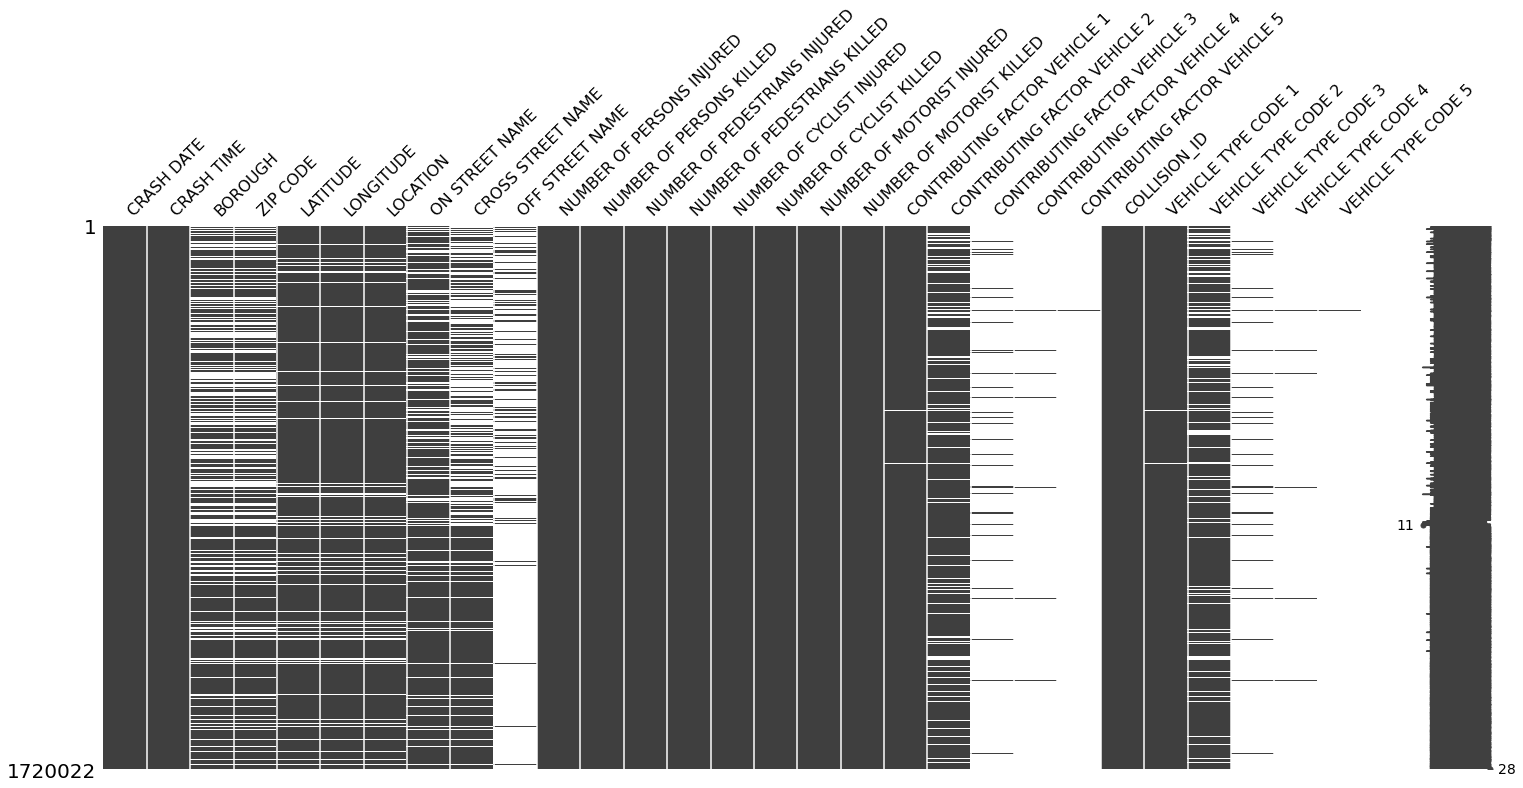

In [24]:
# visual of NAN's

msno.matrix(df);

## Fill in NaN's
Borough, zipcode based on lat & long
<hr/>

In [25]:
zipcodes.head(2)

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostal,@id,longitude,latitude,geometry
0,1,11372,Jackson Heights,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.883573,40.751662,"POLYGON ((-73.86942 40.74916, -73.89143 40.746..."
1,2,11004,Glen Oaks,NY,Queens,36,081,0,http://nyc.pediacities.com/Resource/PostalCode...,-73.711608,40.745366,"POLYGON ((-73.71133 40.74947, -73.71068 40.750..."


In [26]:
#  loop to fill in Nan's of zip & borough

c = 0

# loop through rows in dataframe
for i, row in df.iterrows():
    
    # check which rows are missing zip code and borough 
    if (pd.isnull(row['ZIP CODE']) or pd.isnull(row['BOROUGH'])):# and (row['LOCATION']):
        
        # create Point for geo-positioning 
        geo_point = Point(row['LONGITUDE'],row['LATITUDE'])

        # itterates through and pulls zipcode polys to check 
        for ii, zipcode in zipcodes.iterrows():
            
            # checks polys and updates df rows
            if zipcode['geometry'].contains(geo_point):
                row['ZIP CODE'] = zipcode['postalCode']
                row['BOROUGH'] = zipcode['borough']
                df.at[i,'ZIP CODE'] = zipcode['postalCode']
                df.at[i,'BOROUGH'] = zipcode['borough'].upper()
                c += 1
                break

print(f'Number of rows updated {c}')


KeyboardInterrupt: 

In [ ]:
# visual of NAN's

msno.matrix(df);

### Output cleaned df

In [229]:
# updated DF

df.to_csv('../clean_data/motor_vehicle_collisions-zip_boro.csv', index=False)